<a href="https://colab.research.google.com/github/anilaksu/AI-and-Data-Science-Codes/blob/Natural-Language-Processing/Data_Science_Project_2_Password_Strength_with_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predict Password Strength using Natural Language Processing**


Anil Aksu

Personal e-mail: aaa293@cornell.edu

In a hutshell, we need to classify password data into three categories:


1.   0: Weak
2.   1: Medium
3.   2: Strong



## Notebook Organization:
- **Business Understanding**
- **Data Collection**
- **Data Cleaning**
- **Data Analysis**
- **Feature Engineering**
- **Model Building**
- **Deployment**

Full solution to the project can be found in the [link](https://drive.google.com/drive/folders/1ET_ggkzxtvQ287RyzHB5mcGxNyEbQe48)

In [1]:
# Here we set our working directory in our google drive to access datasets externally
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/ColabNotebooks/Data Science Projects/Password Strength NLP Project

Mounted at /content/drive
/content/drive/MyDrive/ColabNotebooks/Data Science Projects/Password Strength NLP Project


#1. Data Collection

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##1.1 Reading data from SQL Database

You can check your SQLite data from the website in the [link](https://www.sqliteonline.com).

In [3]:
# Here we query password data with SQLite
import sqlite3
conn = sqlite3.connect('password_data.sqlite')       # Here we establish a connection
df = pd.read_sql_query("SELECT * FROM Users", conn)   # Here we form a data table with SQL query
df.head()

,index,password,strength
0,0,zxe870819,1
1,1,xw46454nr23l,1
2,2,soporte13,1
3,3,accounts6000webhost.com,2
4,4,c443balg,1


##2. Data Cleaning

In [4]:
df.drop(['index'], axis = 1, inplace = True) # Here we drop index, which has no use in our analysis
df.head()

,password,strength
0,zxe870819,1
1,xw46454nr23l,1
2,soporte13,1
3,accounts6000webhost.com,2
4,c443balg,1


In [5]:
# Here we check duplicates
df.duplicated().sum()

0

In [6]:
# Here we check missing values
df.isnull().sum()

password    0
strength    0
dtype: int64

In [7]:
# Here we check data types
df.dtypes

password    object
strength     int64
dtype: object

In [8]:
# Here we check if all strength values are between 0-2
df['strength'].unique()

array([1, 2, 0])

#3. Data Analysis

##3.1 Semantic Analysis

Factors contributing to the password strength:
1.   How many password textual actually holds only numeric characters?
2.   How many password textual holds only Upper-case character?
3.   How many password textual holds only alpha-numeric character?
4.   How many password textual holds only title-case character?
5.   How many password textual holds only some special character?

In [9]:
# Here we check if there only numeric characters
df[df['password'].str.isnumeric()]

,password,strength
12280,943801,0
14992,12345,0
20958,147856,0
21671,140290,0
23269,123987,0
28569,1233214,0
31329,0159456,0
32574,363761,0
37855,4524344,0
43648,5521597,0


In [10]:
df[df['password'].str.isnumeric()].shape

(26, 2)

In [11]:
# Here we check if there only Upper-case character
df[df['password'].str.isupper()].shape

(1506, 2)

In [12]:
# Here we check if there only alpha-numeric character
df[df['password'].str.isalnum()]

,password,strength
0,zxe870819,1
1,xw46454nr23l,1
2,soporte13,1
4,c443balg,1
5,16623670p,1
...,...,...
99995,obejofi215,1
99996,fmiopvxb64,1
99997,czvrbun38,1
99998,mymyxe430,1


In [13]:
df[df['password'].str.isalnum()].shape

(97203, 2)

In [14]:
# Here we check if there only title-case character
df[df['password'].str.istitle()]

,password,strength
64,Hisanthoshjasika0,2
242,Therockrockbottom72,2
338,1A2S3D4F,1
367,13269123A,1
526,Csicskarozsika1,2
...,...,...
99168,1053815198M,1
99192,Alfranx05122023,2
99375,Kensington1956,2
99590,V13000993J,1


In [15]:
df[df['password'].str.istitle()].shape

(932, 2)

In [16]:
# Here we check if there only special character
import string           # String package
string.punctuation      # Punctuation characters

def find_semantics(row):
  for char in row:
    if char in string.punctuation:
      return True
    else:
      pass
  return False

In [17]:
df[df['password'].apply(find_semantics)]

,password,strength
3,accounts6000webhost.com,2
68,12463773800+,1
98,p.r.c.d.g.,1
145,cita-cita,1
180,karolina.susnina0U,2
...,...,...
99748,maiselis.com,1
99845,hosting4meze!@#,2
99954,semista_bakung15,2
99980,halflife2010!LEB,2


In [18]:
df[df['password'].apply(find_semantics)].shape

(2663, 2)

#4. Feature Engineering

Dependent on the particular problem you are solving, in our case, we define our features as:
1.   Length
2.   Lower frequency
3.   Upper frequency
4.   Digit frequency
5.   Special character frequency



In [19]:
# Here we add Length as a column
df["length"] = df['password'].str.len()
df.head()

,password,strength,length
0,zxe870819,1,9
1,xw46454nr23l,1,12
2,soporte13,1,9
3,accounts6000webhost.com,2,23
4,c443balg,1,8


In [20]:
# Here we add lower frequency as a column
def freq_lowercase(row):
  return len([char for char in row if char.islower()])/len(row)

In [21]:
# Here we add upper frequency as a column
def freq_uppercase(row):
  return len([char for char in row if char.isupper()])/len(row)

In [22]:
# Here we add digit frequency as a column
def freq_numerical_case(row):
  return len([char for char in row if char.isnumeric()])/len(row)

In [23]:
def freq_special_case(row):
  return len([char for char in row if char in string.punctuation])/len(row)

In [24]:
# Here we apply the functions above
df['lower_freq'] = np.round(df["password"].apply(freq_lowercase), 3)
df['upper_freq'] = np.round(df["password"].apply(freq_uppercase), 3)
df['digit_freq'] = np.round(df["password"].apply(freq_numerical_case), 3)
df['special_freq'] = np.round(df["password"].apply(freq_special_case), 3)
df.head()

,password,strength,length,lower_freq,upper_freq,digit_freq,special_freq
0,zxe870819,1,9,0.333,0.0,0.667,0.000
1,xw46454nr23l,1,12,0.417,0.0,0.583,0.000
2,soporte13,1,9,0.778,0.0,0.222,0.000
3,accounts6000webhost.com,2,23,0.783,0.0,0.174,0.043
4,c443balg,1,8,0.625,0.0,0.375,0.000


##4.1 Performing Descriptive Statistics




In [25]:
# Here we print out the satistics for each column
cols = ['length', 'lower_freq', 'upper_freq', 'digit_freq', 'special_freq']

for col in cols:
  print(df[[col,'strength']].groupby(['strength']).agg(["min","max","mean", "median", "std"]))
  print("\n")

         length                                 
            min  max       mean median       std
strength                                        
0             1    7   6.550947    7.0  0.509951
1             8   13   9.611074    9.0  1.338700
2            14  220  15.953421   16.0  2.560660


         lower_freq                                  
                min    max      mean median       std
strength                                             
0               0.0  1.000  0.708050  0.714  0.181488
1               0.0  0.923  0.630067  0.667  0.217204
2               0.0  0.917  0.424679  0.400  0.166605


         upper_freq                                  
                min    max      mean median       std
strength                                             
0               0.0  1.000  0.012872  0.000  0.094251
1               0.0  0.923  0.007915  0.000  0.069849
2               0.0  0.889  0.367633  0.429  0.195531


         digit_freq                                 

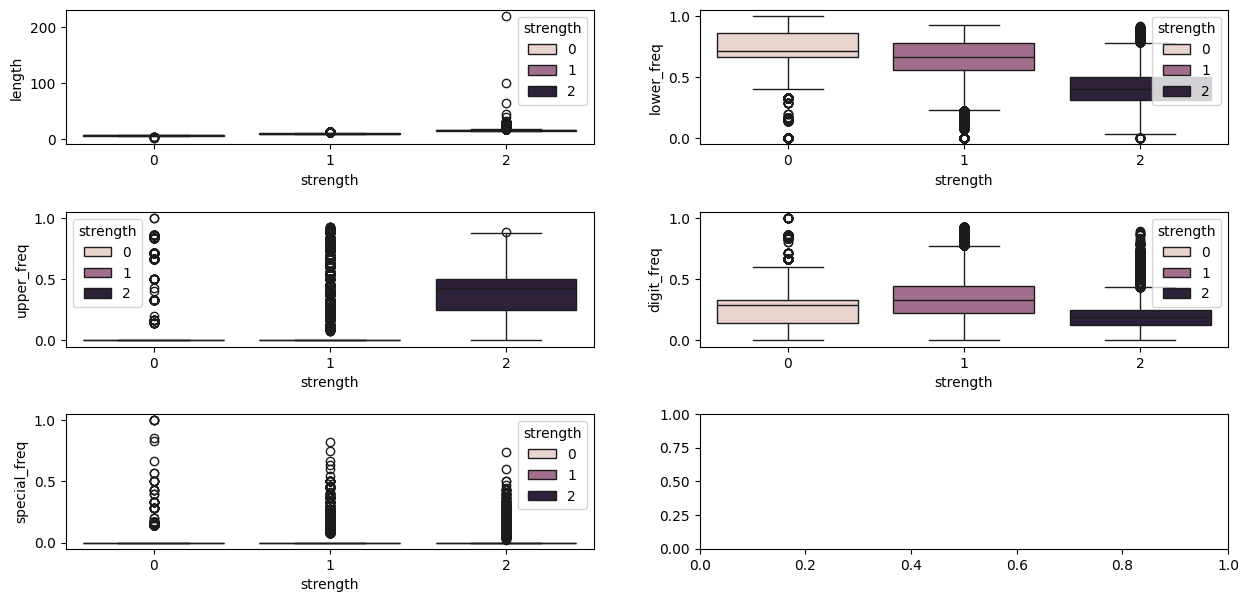

In [26]:
# prompt: create boxplots for each column for my data
import seaborn as sns

fig , ((ax1, ax2 ), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2, figsize = (15,7))

# Plots
sns.boxplot(x = 'strength', y = 'length', hue = "strength", ax = ax1, data = df)
sns.boxplot(x = 'strength', y = 'lower_freq', hue = "strength", ax = ax2, data = df)
sns.boxplot(x = 'strength', y = 'upper_freq', hue = "strength", ax = ax3, data = df)
sns.boxplot(x = 'strength', y = 'digit_freq', hue = "strength", ax = ax4, data = df)
sns.boxplot(x = 'strength', y = 'special_freq', hue = "strength", ax = ax5, data = df)

plt.subplots_adjust(hspace=0.5)

##4.2 Feature Importance

In [44]:
def get_dist(data, feature):

  plt.subplot(1,2,1)

  sns.violinplot(x = 'strength', y = feature, data = data)

  plt.subplot(1,2,2)

  sns.displot(data[data['strength']==0][feature], color = "red", label = "0", kind="kde")
  sns.displot(data[data['strength']==1][feature], color = "green", label = "1", kind="kde" )
  sns.displot(data[data['strength']==2][feature], color = "blue", label = "2", kind="kde")
  plt.legend()
  plt.show()

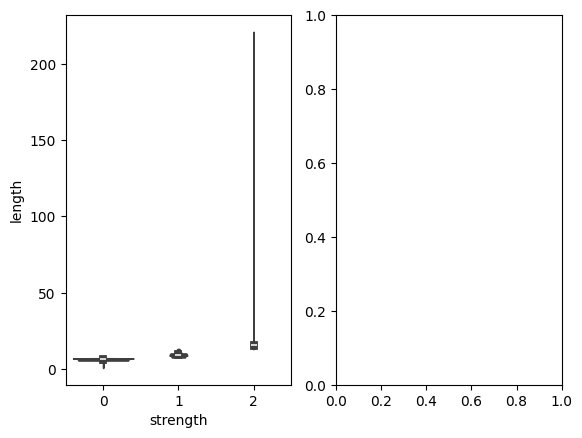

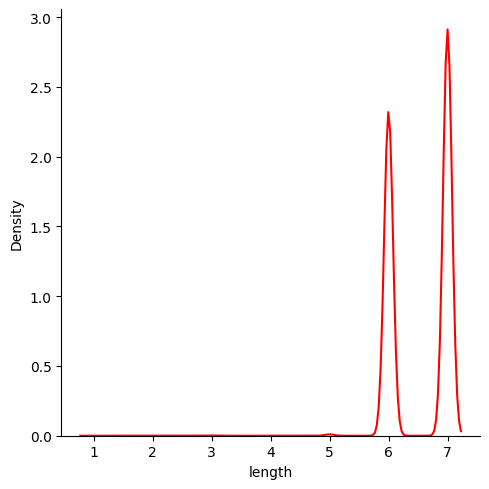

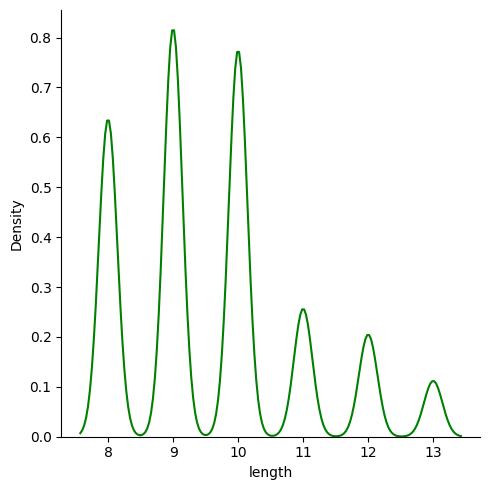

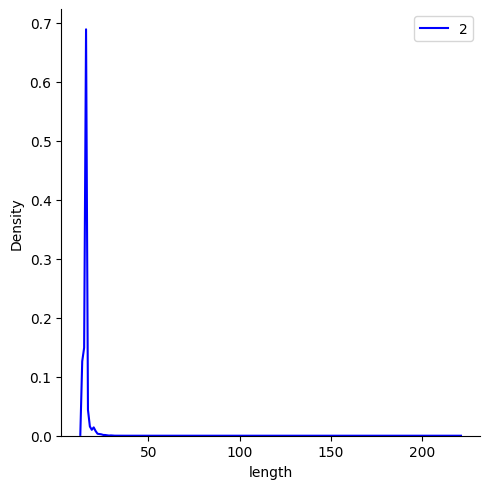

In [45]:
get_dist(df, 'length')

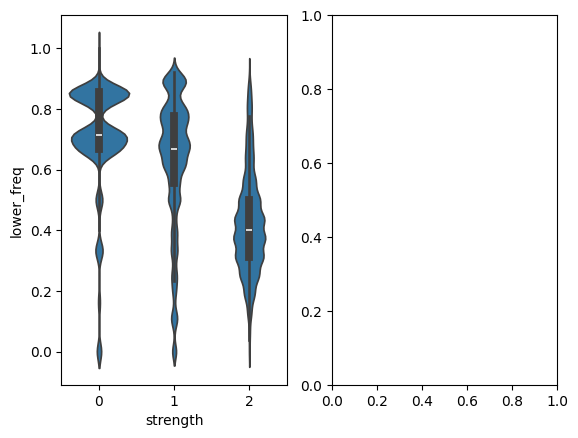

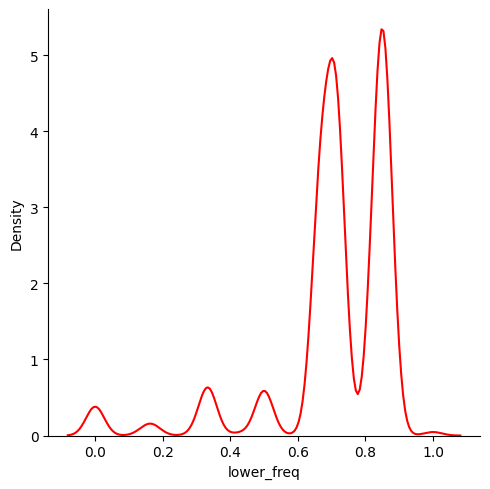

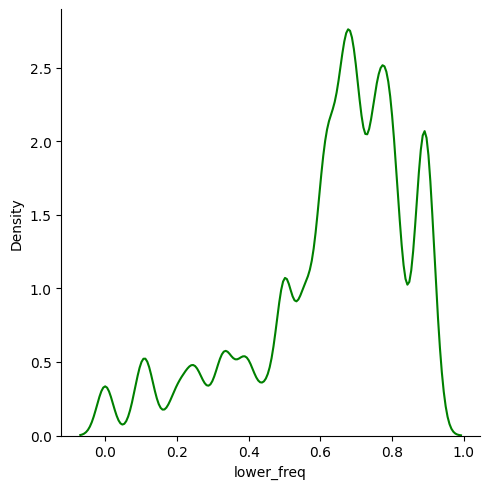

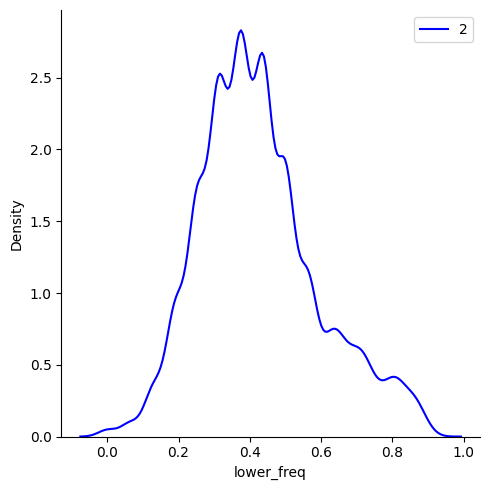

In [48]:
get_dist(df, 'lower_freq')

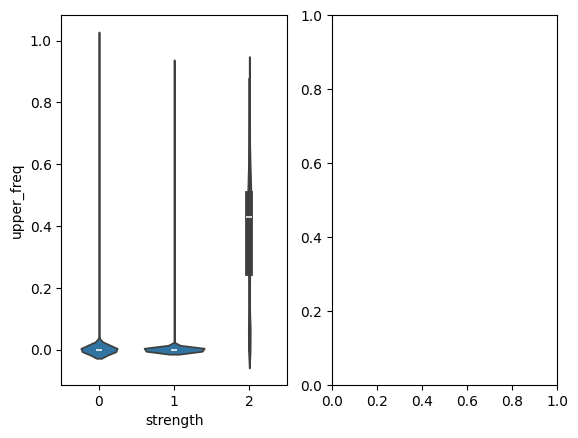

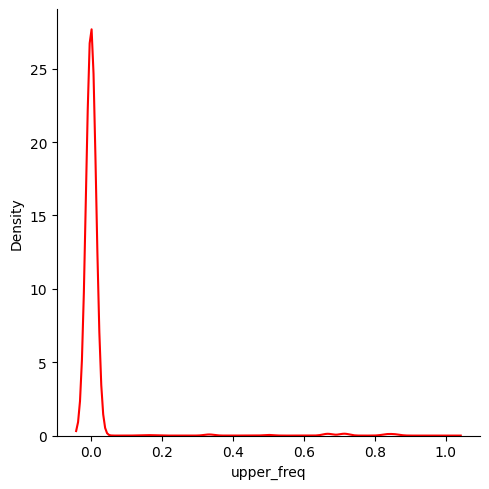

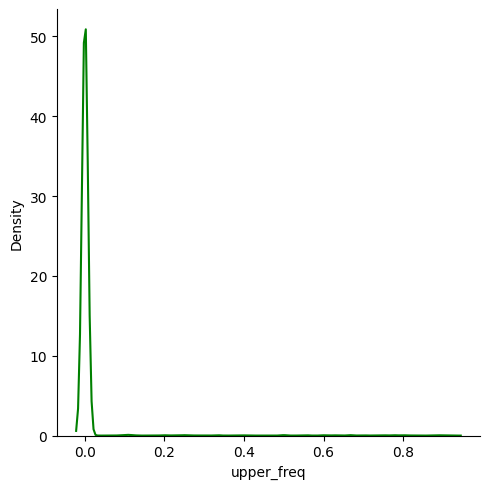

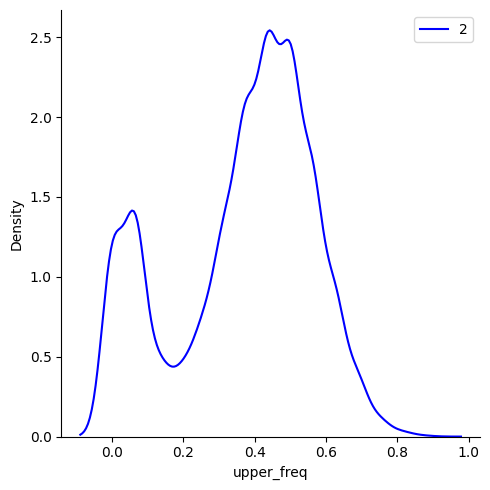

In [49]:
get_dist(df, 'upper_freq')

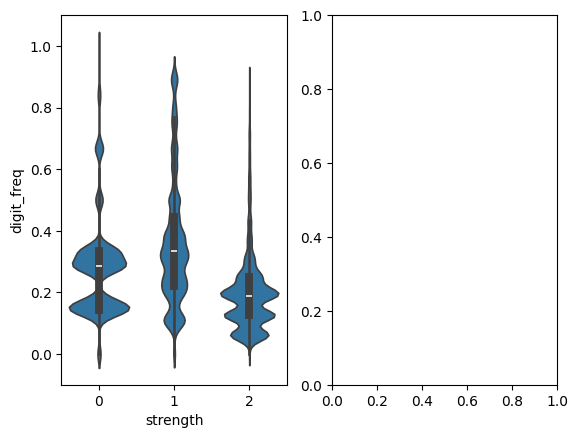

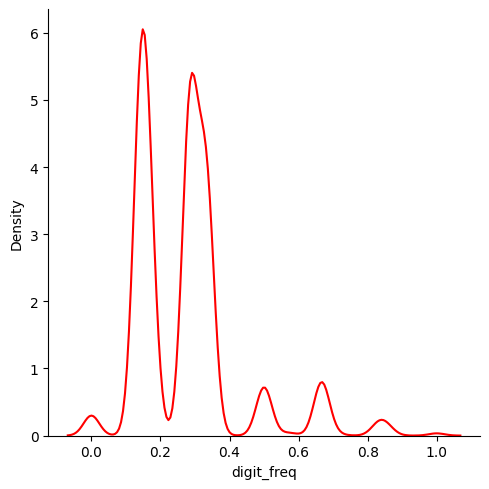

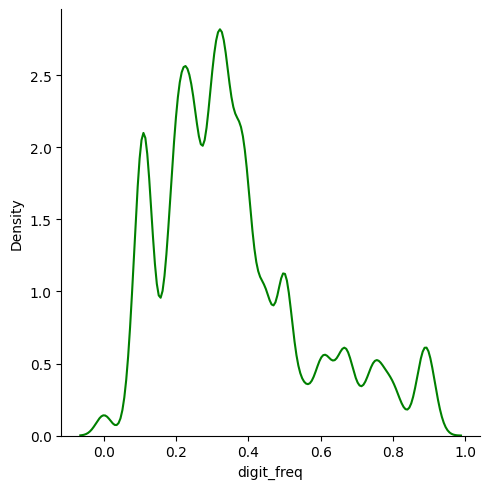

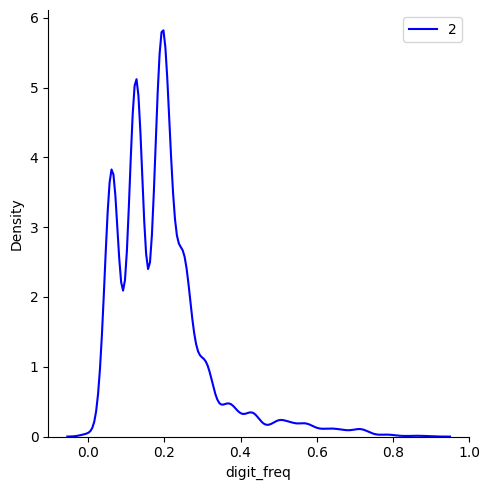

In [50]:
get_dist(df, 'digit_freq')

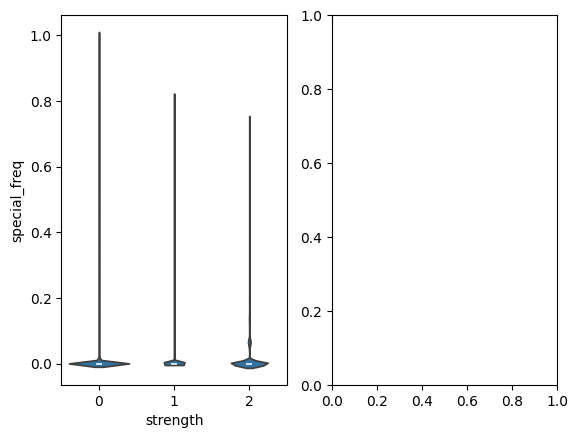

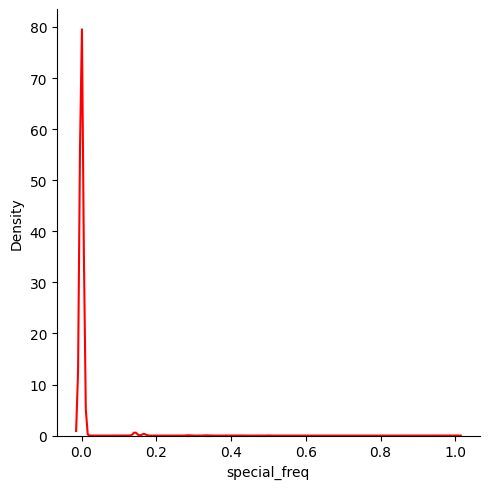

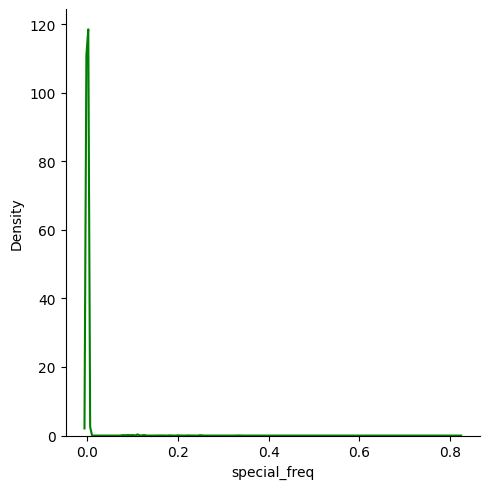

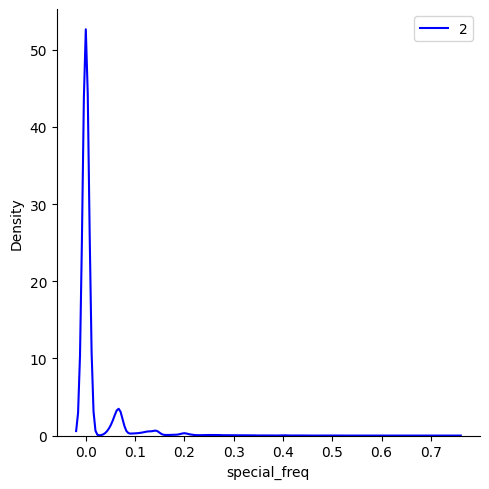

In [51]:
get_dist(df, 'special_freq')

#5. Building Model

**Term Frequency - Inverse Document Frequency (TF-IDF)** gives us vector representation of the text data and orders data based on their importance.

Steps:
1.   Turn data into lower case data so that TF-IDF do not get confused
2.   Calculate TF value = $\frac{\text{# of occurences of a word}}{\text{# of   words in a document}}$
3. Calculate IDF value = $\log \frac{\text{Total # of documents}}{\text{# of   documents containint the word}}$
4.  Calculate TF-IDF as $\text{TF} \times \text{IDF}$



In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Here we shuflle the data
df = df.sample(frac = 1)

# Here we initiate our vectorizer using character
vectorizer = TfidfVectorizer(analyzer = 'char')
# Here we transform our passwords into vectors
X = vectorizer.fit_transform(list(df['password']))
print(X)

  (0, 61)	0.3787503669396062
  (0, 46)	0.3128809811250654
  (0, 21)	0.277338830995772
  (0, 28)	0.40600455136716523
  (0, 50)	0.32422181000988143
  (0, 67)	0.47534178775465713
  (0, 49)	0.43107717523953715
  (1, 53)	0.3299565644216387
  (1, 52)	0.3543177280144458
  (1, 58)	0.4334050427926877
  (1, 45)	0.34464226059585096
  (1, 56)	0.2811600182056544
  (1, 51)	0.3970287790809359
  (1, 21)	0.2375973475797282
  (1, 67)	0.40722731670428947
  (2, 25)	0.33439850548907013
  (2, 26)	0.35037966724181585
  (2, 52)	0.6885273287641379
  (2, 50)	0.539760915457123
  (3, 24)	0.3799663517394559
  (3, 29)	0.3713118420334275
  (3, 54)	0.35345608262777145
  (3, 42)	0.5115152113141447
  (3, 53)	0.36880879462558175
  (3, 56)	0.3142664780532359
  :	:
  (99997, 21)	0.18369869300777214
  (99997, 50)	0.42950439020446723
  (99997, 49)	0.5710582495257762
  (99998, 44)	0.34087502153802174
  (99998, 22)	0.26144969367069626
  (99998, 63)	0.39336529263012715
  (99998, 20)	0.29456065402689224
  (99998, 26)	0.34298251

In [ ]:
# Logistic regression model for classification
